# FlipMart Sales Analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [12]:
df = pd.read_excel("D:\DA_Project_Data\FlipMart_Sales_Data.xlsx")

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Shipping Mode,Customer ID,Customer Name,Segment,City,State,...,Market,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Cost,Quantity,Profit,Order Priority
0,1.0,AG-2012-TB112803-40909,2019-01-01,2019-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,Constantine,Constantine,...,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,35.46,2.0,106.140,Medium
1,2.0,IN-2012-JH159857-40909,2019-01-01,2019-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,9.72,3.0,36.036,Medium
2,3.0,HU-2012-AT73557-40909,2019-01-01,2019-01-05,Second Class,AT-73557,Annie Thurman,Consumer,Budapest,Budapest,...,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.120,8.17,4.0,29.640,High
3,4.0,IT-2012-EM14140124-40909,2019-01-01,2019-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,Stockholm,Stockholm,...,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,4.82,3.0,-26.055,High
4,5.0,IN-2012-JH159857-40909,2019-01-01,2019-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,4.70,5.0,37.770,Medium


In [14]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Shipping Mode,Customer ID,Customer Name,Segment,City,State,...,Market,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Cost,Quantity,Profit,Order Priority
51301,51286.0,MO-2015-LP709586-42369,2022-12-31,2023-01-05,Standard Class,LP-709586,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1.490,1.0,0.42,Medium
51302,51287.0,IN-2015-KM1622527-42369,2022-12-31,2023-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,Shantou,Guangdong,...,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,1.410,3.0,25.38,Medium
51303,51288.0,MX-2015-CM1219093-42369,2022-12-31,2023-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,Managua,Managua,...,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,1.350,3.0,12.36,Medium
51304,51289.0,MX-2015-JB1604582-42369,2022-12-31,2023-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,Reynosa,Tamaulipas,...,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,1.324,3.0,0.66,Medium
51305,51290.0,MX-2015-TD2099582-42369,2022-12-31,2023-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1.199,1.0,0.56,Medium


## Meta Data

In [15]:
print("Number of Row:", df.shape[0])

Number of Row: 51306


In [9]:
print("Number Of Fields:", df.shape[1])

Number Of Fields: 22


In [10]:
df.info

<bound method DataFrame.info of         Row ID                  Order ID Order Date  Ship Date  \
0          1.0    AG-2012-TB112803-40909 2019-01-01 2019-01-06   
1          2.0    IN-2012-JH159857-40909 2019-01-01 2019-01-08   
2          3.0     HU-2012-AT73557-40909 2019-01-01 2019-01-05   
3          4.0  IT-2012-EM14140124-40909 2019-01-01 2019-01-05   
4          5.0    IN-2012-JH159857-40909 2019-01-01 2019-01-08   
...        ...                       ...        ...        ...   
51301  51286.0    MO-2015-LP709586-42369 2022-12-31 2023-01-05   
51302  51287.0   IN-2015-KM1622527-42369 2022-12-31 2023-01-07   
51303  51288.0   MX-2015-CM1219093-42369 2022-12-31 2023-01-02   
51304  51289.0   MX-2015-JB1604582-42369 2022-12-31 2023-01-04   
51305  51290.0   MX-2015-TD2099582-42369 2022-12-31 2023-01-06   

        Shipping Mode  Customer ID     Customer Name      Segment  \
0      Standard Class    TB-112803   Toby Braunhardt     Consumer   
1      Standard Class    JH-159857   

## Data Types 

In [16]:
df.dtypes

Row ID                   float64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Shipping Mode             object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Shipping Cost            float64
Quantity                 float64
Profit                   float64
Order Priority            object
dtype: object

In [17]:
df.describe

<bound method NDFrame.describe of         Row ID                  Order ID Order Date  Ship Date  \
0          1.0    AG-2012-TB112803-40909 2019-01-01 2019-01-06   
1          2.0    IN-2012-JH159857-40909 2019-01-01 2019-01-08   
2          3.0     HU-2012-AT73557-40909 2019-01-01 2019-01-05   
3          4.0  IT-2012-EM14140124-40909 2019-01-01 2019-01-05   
4          5.0    IN-2012-JH159857-40909 2019-01-01 2019-01-08   
...        ...                       ...        ...        ...   
51301  51286.0    MO-2015-LP709586-42369 2022-12-31 2023-01-05   
51302  51287.0   IN-2015-KM1622527-42369 2022-12-31 2023-01-07   
51303  51288.0   MX-2015-CM1219093-42369 2022-12-31 2023-01-02   
51304  51289.0   MX-2015-JB1604582-42369 2022-12-31 2023-01-04   
51305  51290.0   MX-2015-TD2099582-42369 2022-12-31 2023-01-06   

        Shipping Mode  Customer ID     Customer Name      Segment  \
0      Standard Class    TB-112803   Toby Braunhardt     Consumer   
1      Standard Class    JH-159857 

## Total Sales

In [19]:
total_sales = df["Sales"].sum()
print("Total sales :", round(total_sales,2))

Total sales : 12642501.91


## Total Profit

In [20]:
total_profit = df["Profit"].sum()
print("Total Profit:", round(total_profit,2))

Total Profit: 1467457.29


## Monthly Total Profit

In [24]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
monthly_profit = df.groupby(df["Ship Date"].dt.month)["Profit"].sum()
print(monthly_profit)

Ship Date
1.0      82717.79242
2.0      74292.85298
3.0      92139.00944
4.0      71494.09154
5.0      99634.72716
6.0     139194.60278
7.0      93254.88398
8.0     143821.35004
9.0     171924.08822
10.0    157983.68972
11.0    172872.58400
12.0    168127.61900
Name: Profit, dtype: float64


## Chart Design

## Total Sales by Shipping Mode

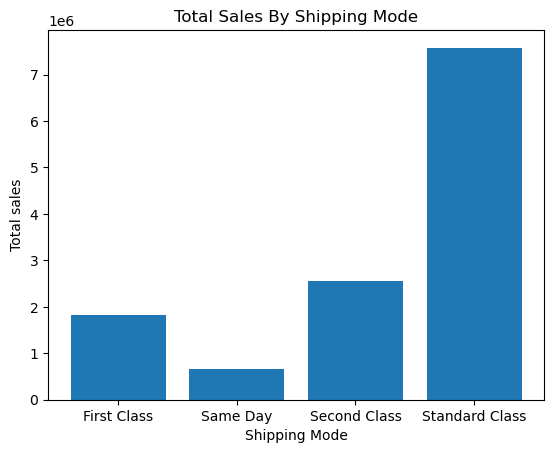

In [29]:
sales_by_shipping = df.groupby("Shipping Mode")["Sales"].sum()

plt.Figure()
plt.bar(sales_by_shipping.index, sales_by_shipping.values)
plt.xlabel("Shipping Mode")
plt.ylabel("Total sales")
plt.title("Total Sales By Shipping Mode")

plt.show()

## Sum of Sales, Quantity, and Profit by Month

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18024\2415730260.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



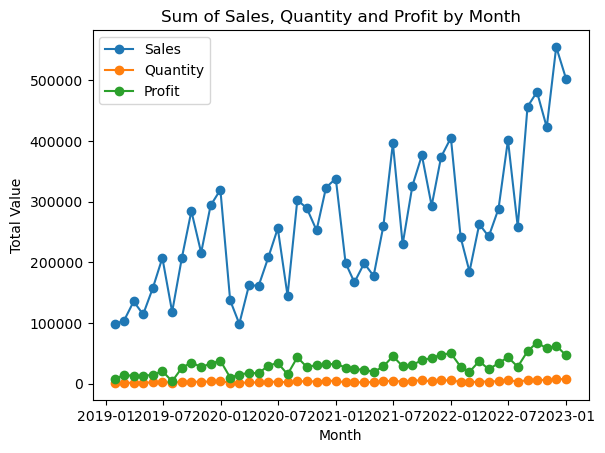

In [46]:
df.columns = df.columns.str.strip()

# Convert Order Date to datetime
df.reset_index(inplace=True)
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Set Order Date as index
df.set_index("Order Date", inplace=True)

# Monthly aggregation (ONLY numeric columns)
monthly_data = df.resample("M")[["Sales", "Quantity", "Profit"]].sum()

# Plot line chart
plt.figure()
plt.plot(monthly_data.index, monthly_data["Sales"], marker="o", label="Sales")
plt.plot(monthly_data.index, monthly_data["Quantity"], marker="o", label="Quantity")
plt.plot(monthly_data.index, monthly_data["Profit"], marker="o", label="Profit")

plt.xlabel("Month")
plt.ylabel("Total Value")
plt.title("Sum of Sales, Quantity and Profit by Month")
plt.legend()
plt.show()

## Total Profit by Category

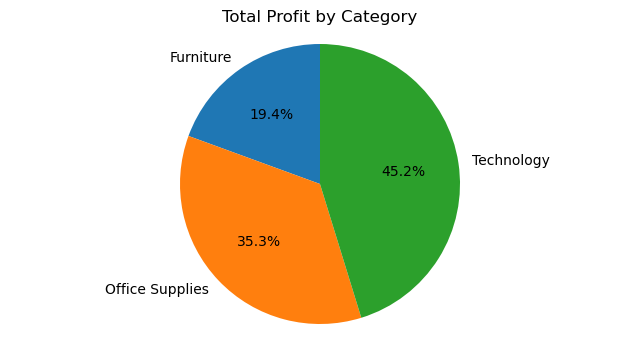

In [49]:
# Calculate total profit by category
profit_by_category = df.groupby("Category")["Profit"].sum()

# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(profit_by_category.values, labels=profit_by_category.index, 
        autopct="%1.1f%%", startangle=90)
plt.title("Total Profit by Category")
plt.axis("equal")
plt.show()

## Sum of Sales by Top 5 State

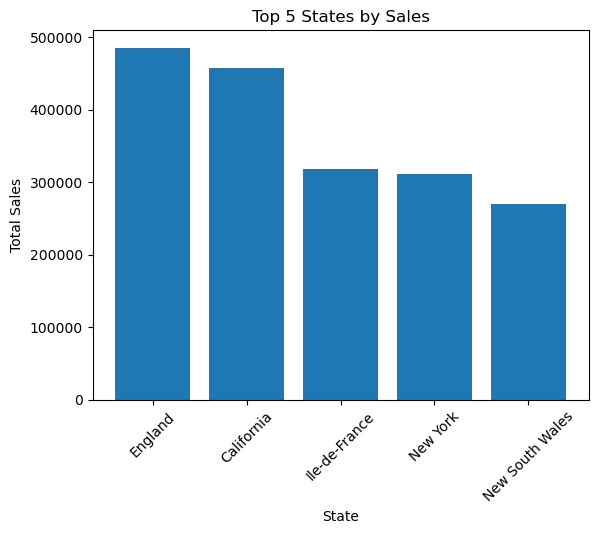

In [52]:
sales_by_state = df.groupby("State")["Sales"].sum()

# Get top 5 states by sales
top_5_states = sales_by_state.sort_values(ascending=False).head(5)

# Bar chart
plt.figure()
plt.bar(top_5_states.index, top_5_states.values)
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Top 5 States by Sales")
plt.xticks(rotation=45)
 
plt.show()

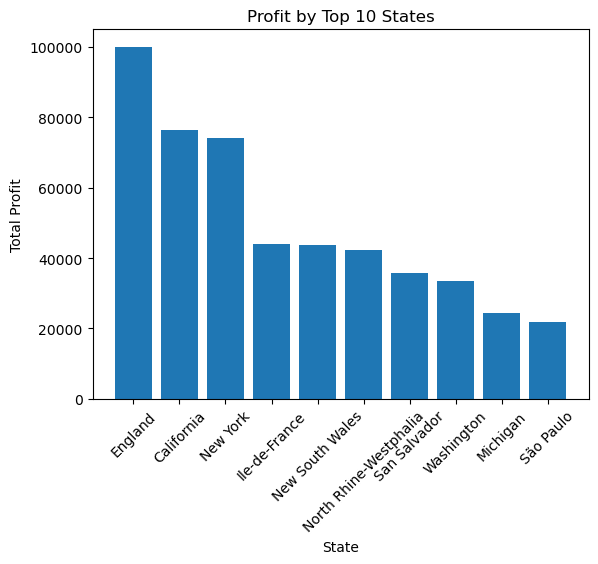

In [54]:
profit_by_state = df.groupby("State")["Profit"].sum()

# Get top 10 states by profit
top_10_states = profit_by_state.sort_values(ascending=False).head(10)

# Bar chart
plt.figure()
plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel("State")
plt.ylabel("Total Profit")
plt.title("Profit by Top 10 States")
plt.xticks(rotation=45)

plt.show()

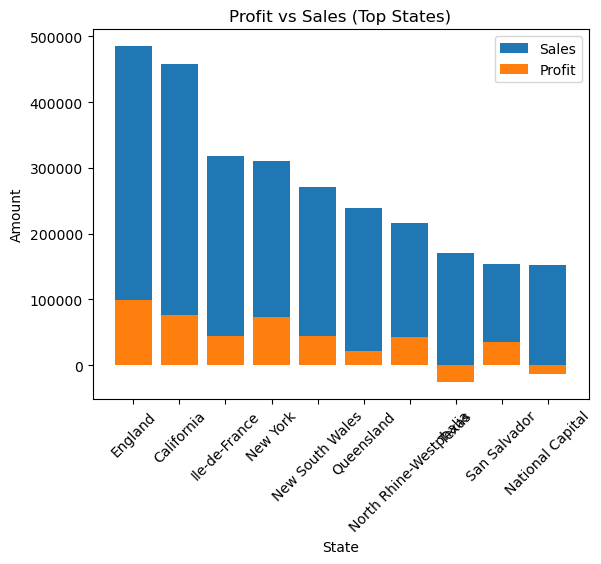

In [55]:
state_summary = df.groupby("State")[["Sales", "Profit"]].sum()

# Select top 10 states by sales
top_states = state_summary.sort_values(by="Sales", ascending=False).head(10)

# Bar chart
plt.figure()
plt.bar(top_states.index, top_states["Sales"], label="Sales")
plt.bar(top_states.index, top_states["Profit"], label="Profit")

plt.xlabel("State")
plt.ylabel("Amount")
plt.title("Profit vs Sales (Top States)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

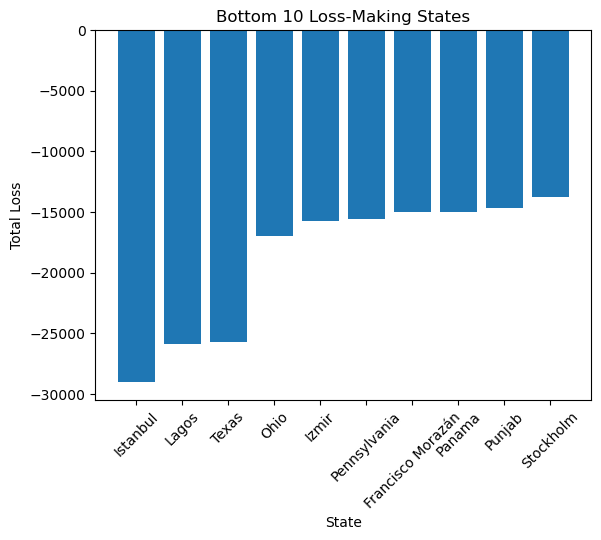

In [56]:
profit_by_state = df.groupby("State")["Profit"].sum()

# Filter loss-making states
loss_states = profit_by_state[profit_by_state < 0]

# Bottom 10 loss-making states
bottom_10_loss_states = loss_states.sort_values().head(10)

# Bar chart
plt.figure()
plt.bar(bottom_10_loss_states.index, bottom_10_loss_states.values)
plt.xlabel("State")
plt.ylabel("Total Loss")
plt.title("Bottom 10 Loss-Making States")
plt.xticks(rotation=45)

plt.show()